# Logistic Map

Un mapa logistico es un mapa polinomial de grado 2. Es utilizado para simular el crecimiento de una población o para crear número pseudo-aleatorios debido al comportamiendo caótico que tiene.

La ecuación recursiva del mapa logístico se ve de la siguiente forma:
$$
x_{n+1} = r x_n ( 1 - x_n),
$$

donde $x_n$ es un número entre 0 y 1, que representa, en el caso del crecimiento de una población, el valor de la población al tiempo $t_n$. El parámetro $r$ puede tomar valores en el intervalo $[0,4]$, y se puede considerar como la tasa de crecimiento de la población

In [1]:
## Uncomment this lines for interactive plots
%matplotlib notebook
from ipywidgets import *
from matplotlib.widgets import Slider, Button, RadioButtons

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['text.usetex'] = True
plt.rc('font', family='serif')
plt.rc('text', usetex=True)

Creamos una clase que itera el mapa logistico hasta obtener una población estable

In [2]:
class Bifurcation_Logistic_Map:
    def __init__(self,x_0=0.5,n_skip=100,n_iter=10,r_0=2.8,r_f=4.0,step=0.0001):
        self.x_0    = x_0
        self.n_skip = n_skip
        self.n_iter = n_iter
        self.r_0    = r_0
        self.r_f    = r_f
        self.step   = step
        
    # Logistic function implementation
    def logistic_eq(self,r,x):
        return r*x*(1-x)
                
    def bifurcation_diagram(self):
        #print("Starting with x0 seed {0}, skip plotting first {1} iterations, then plot next {2} iterations.".format(self.x_0, self.n_skip, self.n_iter))
        
        # Array of r values (x axis) and x values (y axis)
        R = [] # Los valores del factor de natalidad
        X = [] # La población final
        
        # Llenamos el vector r_range con todos los valores que queremos estudiar de la
        # factor de natalidad
        r_range = np.linspace(self.r_0,self.r_f,int(1.0/self.step))
        
        # Para cada factor r
        for r in r_range:
            x = self.x_0 # Inicio con una población x_0
            
            # Iterate for n_skip and plot last n_iter
            for i in range(self.n_iter+self.n_skip+1): # Iterar el mapa logistico hasta obtener una población final
                if i >= self.n_skip:
                    R.append(r)
                    X.append(x)
                    
                x = self.logistic_eq(r,x)
        
        self.R = R
        self.X = X
        
        return R, X # Factor r para cada población final
        
    def simple_plot(self,R,X,ymin=0,ymax=1):
        self.fig = plt.figure()
        ax  = self.fig.add_subplot(111)
        
        plt.plot(R, X, ls='', marker=',')
        ax.set_xlim([self.r_0,self.r_f])
        ax.set_ylim([ymin,ymax])
        ax.set_xlabel("Growth rate")
        ax.set_ylabel("Population")
        
    def slider_plot(self,R,X,ymin=0,ymax=1):
        self.r = np.array(R)
        self.x = np.array(X)
        
        self.fig = plt.figure()
        ax  = self.fig.add_subplot(111)
        
        self.fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9)
        
        [self.line] = plt.plot(self.r_var(self.r_0,self.r_0), self.x_var(self.r_0,self.r_0), \
                               ls='', marker=',',)
        ax.set_xlim([self.r_0,self.r_f])
        ax.set_ylim([ymin,ymax])
        ax.set_xlabel("Growth rate")
        ax.set_ylabel("Population")
        ax.set_title("Initial population $x_0 ={0}$".format(self.x_0))
        
        #r_slider_ax = self.fig.add_axes([0.1,0.10,0.8,0.03])
        #self.r_slider    = Slider(r_slider_ax,'x',self.r_0,self.r_f,valinit=self.r_0)
        #self.r_slider.on_changed(self.sliders_on_changed)
        interact(self.sliders_on_changed,r=widgets.FloatSlider(min=self.r_0, max=self.r_f, \
                                                                 step=self.step, value=self.r_0))
        
        #html_str = mpld3.fig_to_html(self.fig)
        #Html_file= open("index.html","w")
        #Html_file.write(html_str)
        #Html_file.close()
        
        plt.show()
        
    def r_var(self,r0,rf):
        return self.r[:np.where(self.r <= rf)[0].max() + 1]
    
    def x_var(self,r0,rf):
        return self.x[:np.where(self.r <= rf)[0].max() + 1]
    
    def sliders_on_changed(self,r):
        #self.line.set_xdata(self.r_var(self.r_0,self.r_slider.val))
        #self.line.set_ydata(self.x_var(self.r_0,self.r_slider.val))
        self.line.set_xdata(self.r_var(self.r_0,r))
        self.line.set_ydata(self.x_var(self.r_0,r))
        self.fig.canvas.draw_idle()


In [9]:
b2 = Bifurcation_Logistic_Map(x_0 = 0.5,r_0 = 2.8,step=0.0001)

In [10]:
r2, x2 = b2.bifurcation_diagram()

<IPython.core.display.Javascript object>


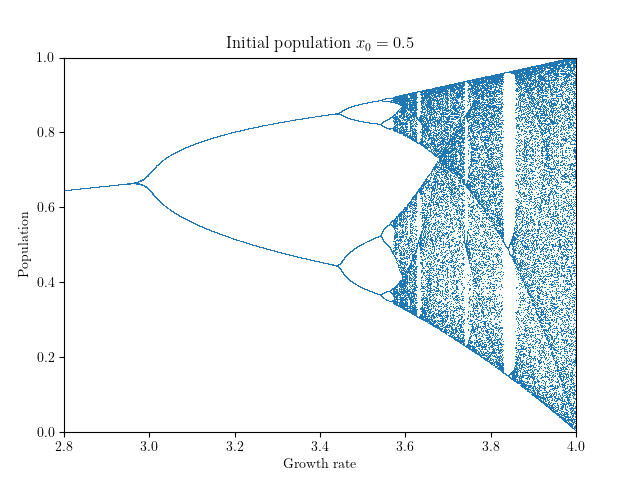

interactive(children=(FloatSlider(value=2.8, description='r', max=4.0, min=2.8, step=0.0001), Output()), _dom_…

In [11]:
b2.slider_plot(r2,x2,ymin=0,ymax=1)